<a href="https://colab.research.google.com/github/neeleshbisht99/MLNG23/blob/main/linear_regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
housing = pd.read_csv('./Housing.csv')
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [3]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [5]:
# Simple linear regression
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [6]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


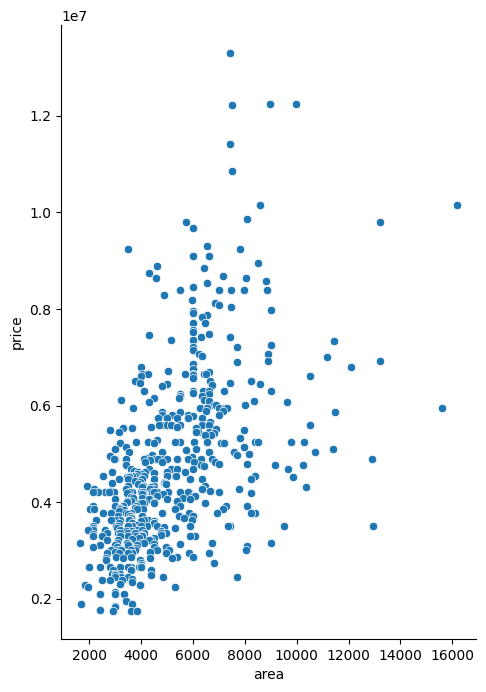

In [7]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

In [8]:
import numpy as np
X = np.array(X)
y = np.array(y)


In [13]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current).astype(np.longdouble)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)

In [14]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,y)
gradients

<ipython-input-13-7c7241a880e2>:11: RuntimeWarning: overflow encountered in double_scalars
  m_gradient = -(2/N) * sum(X * (y - y_current))
<ipython-input-13-7c7241a880e2>:13: RuntimeWarning: invalid value encountered in double_scalars
  m_current = m_current - (learning_rate * m_gradient)


,m_current,c_current,cost
0,5.344584e+08,9.533458e+04,2.621383e+13
1,-3.338104e+14,-5.505481e+10,8.920389e+24
2,2.084906e+20,3.438603e+16,3.479822e+36
3,-1.302186e+26,-2.147676e+22,1.357470e+48
4,8.133169e+31,1.341391e+28,5.295459e+59
...,...,...,...
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN
998,NaN,NaN,NaN


<Axes: xlabel='index'>

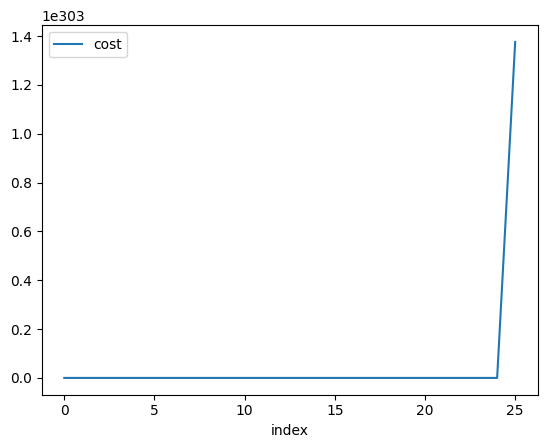

In [15]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])

In [21]:
# Assigning feature variable X
X = housing[['area','bedrooms']]

# Assigning response variable y
y = housing['price']
X.head()

,area,bedrooms
0,7420,4
1,8960,4
2,9960,3
3,7500,4
4,7420,4


In [22]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function
X.head()
X['intercept'] = 1
X = X.reindex(['intercept','area','bedrooms'], axis=1)
X.head()


<ipython-input-22-bcc3674064d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,intercept,area,bedrooms
0,1,7420,4
1,1,8960,4
2,1,9960,3
3,1,7500,4
4,1,7420,4


In [23]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [24]:
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [26]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [27]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [29]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.squar

,Bets,cost
0,"[47667.29247706423, 267229200.50091743, 146390...",1.115046e+24
1,"[-13763659778.542334, -83452354160204.69, -414...",1.087439e+35
2,"[4298235557196591.5, 2.6061214533835133e+19, 1...",1.060515e+46
3,"[-1.34228974243929e+21, -8.138618853913808e+24...",1.034258e+57
4,"[4.191817150750378e+26, 2.541597467120574e+30,...",1.008651e+68
...,...,...
995,"[nan, nan, nan]",NaN
996,"[nan, nan, nan]",NaN
997,"[nan, nan, nan]",NaN
998,"[nan, nan, nan]",NaN


<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-26-2de552739d97>:6: RuntimeWarning: overflow encountered in square
  return np.sum(np.squar

<Axes: xlabel='index'>

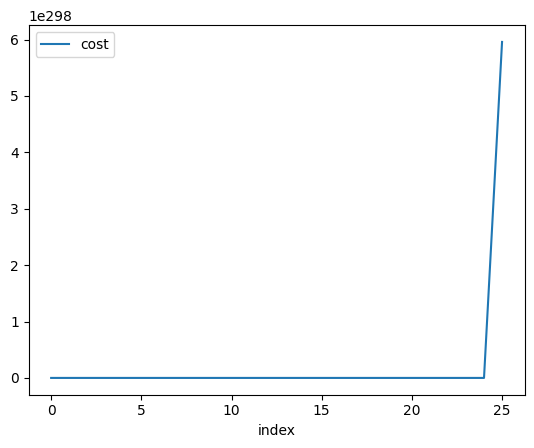

In [30]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])